<a href="https://colab.research.google.com/github/mehtaabhi4/TensorFlow-Learning/blob/main/01_neural_network_regression_with_tensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Created by ABHILAKSHYA MEHTA**

---





# Introduction to Regression with Neural Networks in TensorFlow

There are many defintions for a regression problem but in our case, we're going to simplify it: Predicting a numercial variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating Data to View and Fit

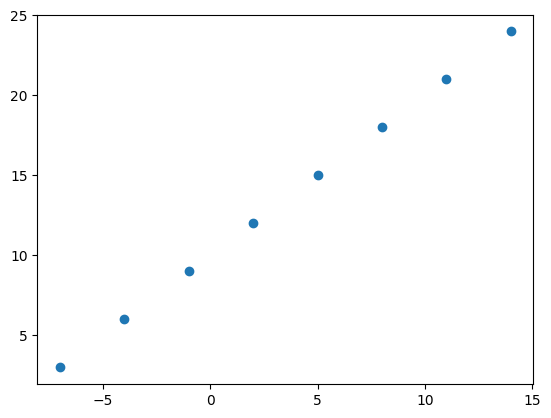

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

# Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
X[0], y[0]

(-7.0, 3.0)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [6]:
X[0].ndim

0

In [7]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

# Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layesrs, as well as the hidden layers of a deep learning model.
2. **Compliling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the pattens its learning) and evalutaion metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer= tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the Model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 14.0074 - mae: 14.0074
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 13.8749 - mae: 13.8749
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 13.7424 - mae: 13.7424
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 13.6099 - mae: 13.6099
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 13.4774 - mae: 13.4774


In [10]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 165ms/step


array([[0.5604035]], dtype=float32)

In [12]:
y_pred + 11

array([[11.560404]], dtype=float32)

# Improving our Model
We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization funciton.

3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [13]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Coompile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 748ms/step - loss: 12.9223 - mae: 12.9223
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.3993 - mae: 12.3993
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.8688 - mae: 11.8688
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3261 - mae: 11.3261
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7724 - mae: 10.7724
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.1970 - mae: 10.1970
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 9.5944 - mae: 9.5944
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9600 - mae: 8.9600
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.2884 - mae: 8.2884
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.5721 - mae: 7.5721
Epoch 11/100
1/1 [==============================] - 0s 1

In [14]:
# Remind of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Let's see if model's prediciton has improved
model.predict([17.0])

1/1 [==============================] - 0s 187ms/step


array([[32.971077]], dtype=float32)

**Common ways to improve a deep model**
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
(The learning rate is the most important hyperparameter of many different neural networks)
* Fitting on more data
* Fitting for longer

# Evaluating a Model

In practice, typical workflow when building neural network is:

```
Build model -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it -> Tweak it -> Evaluate it...
```


When it comes to evaluation...There are 3 words should memoriza:
> "Visualiza, Visualize, Visualize"

It's a good idea to Visualize:
* The data - What data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - How does a model perform while it learns?
* The predictions of the model - How do the predictions of a model line up against the ground truth (the orginal labels)?

In [16]:
# Make a big dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
# Make labels for the datasets
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

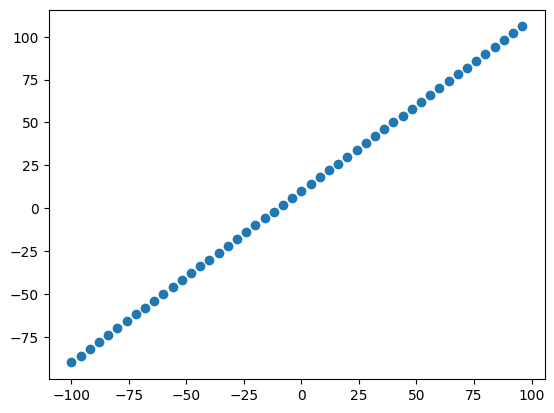

In [18]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

## The 3 sets...
* Training Set - The model learns from this data, which is typically 70-80% of the total data you have available.
* Validation Set - The model gets tuned on this data, which is typically 10-15% of the data available.
* Test Set - The model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.



In [19]:
# Check the length of how many samples we have
len(X)

50

In [20]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # Last 10 are testing samples (20% of the data)
y_test = y[40:]

## Visualize the data
Now we've got our data in training and test sets... let's visualize it again!

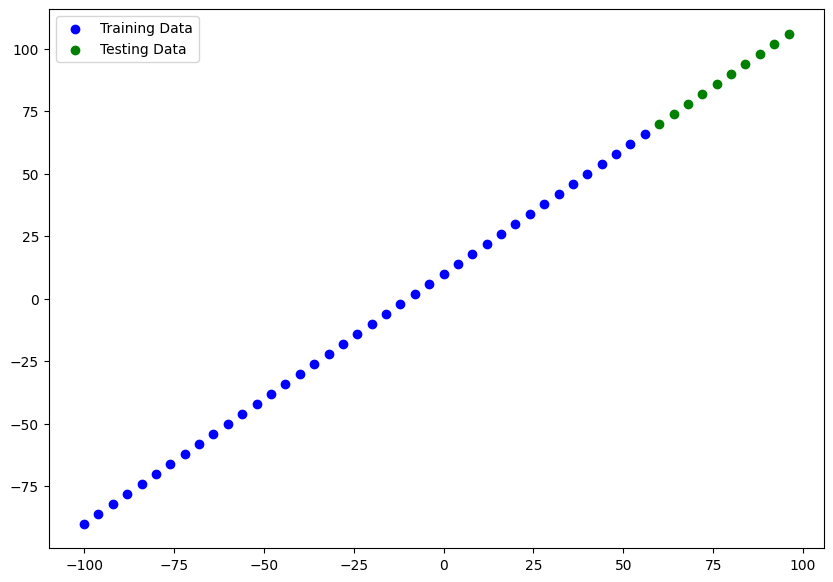

In [21]:
plt.figure(figsize=(10, 7))

# Plot training data in Blue
plt.scatter(X_train, y_train, c="b", label="Training Data")

# Plot test data in Green
plt.scatter(X_test, y_test, c="g", label="Testing Data")

# Show a legend
plt.legend()

In [22]:
# Let's build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(X_trian, y_train, epochs=100)

## Visualzing the Model

In [23]:
# model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [24]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [25]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above) with input_shape
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - Total number of parameters in the model.
* Trainable parameters - These are the parameters (patterns) the model can update as it trains.
* Non-Trainable params - These parameters aren't updated during training (this is typiccal when you bring in already learn patterns or parameters from other models during **transfer learning**).



In [27]:
# Let's fit the model to the traning data
model.fit(X_train, y_train, epochs=100, verbose=0)

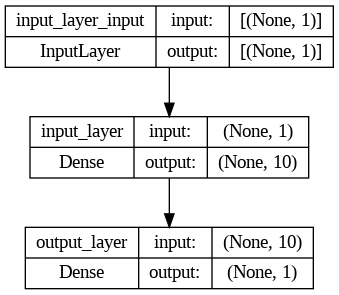

In [28]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing our model's predicitons

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often we'll see this in the form of `y_test` or `y_true` versus `y_pred`

In [29]:
# Make Predictions
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 93ms/step


In [30]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend()

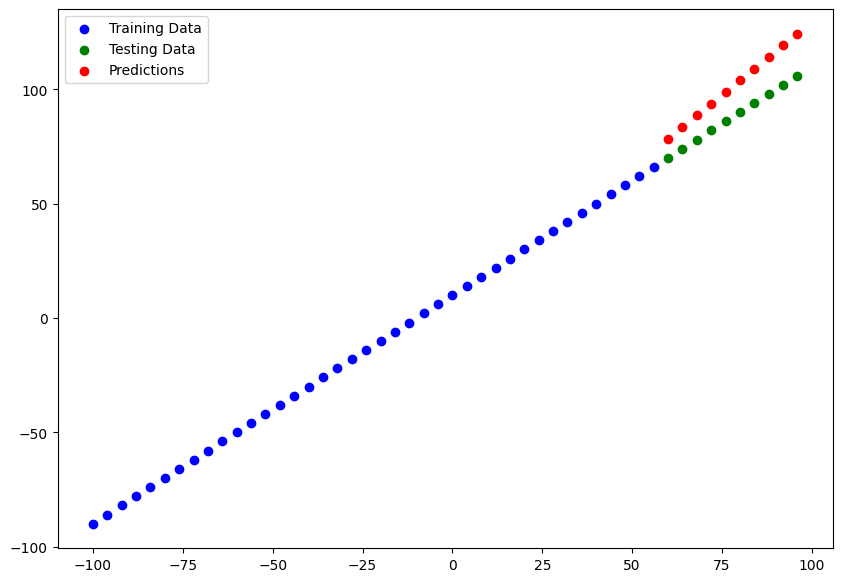

In [31]:
plot_predictions(train_data=X_train, train_labels=y_train,
                 test_data=X_test, test_labels=y_test,
                 predictions=y_pred)

# Evaluating our model's predictions with regression evalution metrics  

Depending on the problem we're working on, there will be different evaluation metrics to evaluate our model's performance.

Since we're working on a regression, two of the main metrics:
n  
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
  * When to use: As a great starter metric for any regression problem.

* MSE - mean square error, "square the average errors"
  * When to use: When larger errors are more significant than smaller errors.

** Other one **

* Huber - Combination of MSE and MAE. Less sensitive to outliers than MSE.

In [32]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 329ms/step - loss: 13.3045 - mae: 13.3045


[13.304494857788086, 13.304494857788086]

In [33]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.265112 , 10.5117855, 10.       , 10.729747 , 12.851547 ,
       16.285126 , 20.960243 , 26.064087 , 31.167933 , 36.271767 ],
      dtype=float32)>

In [34]:
y_pred.shape

(10, 1)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.33722 ,  83.44107 ,  88.54491 ,  93.648735,  98.75258 ,
       103.85641 , 108.96024 , 114.06409 , 119.16793 , 124.27177 ],
      dtype=float32)>

In [37]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.304495>

In [38]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=187.06186>

In [39]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))

# Running experiments to improve our Model

1. Get more data
2. Make Model larger (using more complex model)
3. Train for longer

Let's do 3 Modelling Experiments:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.


In [40]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

## Build `model_1`

In [41]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 19ms/step - loss: 41.4067 - mae: 41.4067
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 12.6684 - mae: 12.6684
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 11.2655 - mae: 11.2655
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.5864 - mae: 9.5864
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 10.4971 - mae: 10.4971
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.7215 - mae: 9.7215
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 8.8150 - mae: 8.8150
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0731 - mae: 9.0731
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 19.3477 - mae: 19.3477
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4520 - mae: 10.4520
Epoch 11/100
2/2 [==============================] - 0s 11ms/

1/1 [==============================] - 0s 144ms/step


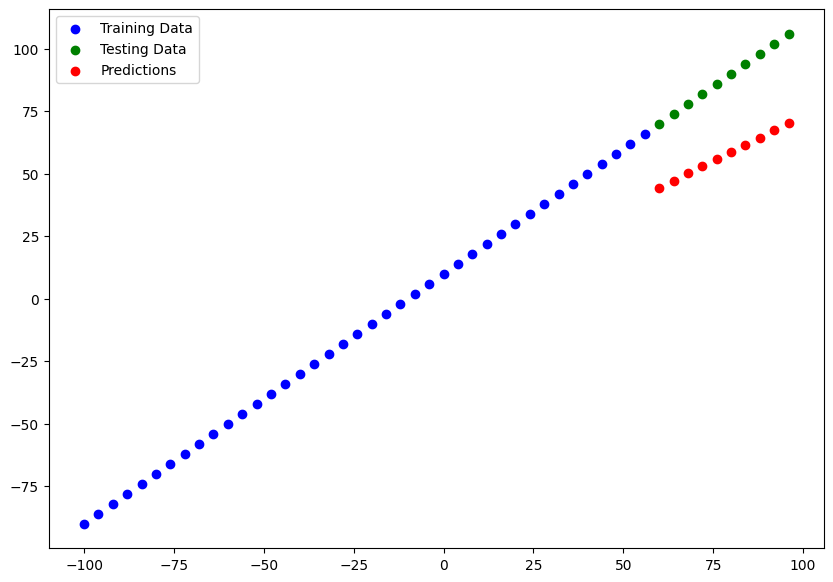

In [42]:
# Make and plot predicitons for model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [43]:
# Calculate model_1 evaluation  metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.707941>,
 <tf.Tensor: shape=(), dtype=float32, numpy=953.479>)

## Build `model_2`
* 2 Dense layers, trained for 100 epochs

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 8.7233 - mse: 112.7922
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 48.3058 - mse: 3634.2173
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 34.3598 - mse: 1735.1703
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 15.7623 - mse: 339.9612
Epoch 5/100
2/2 [==============================] - 0s 38ms/step - loss: 23.2445 - mse: 750.4275
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 9.8396 - mse: 126.4138
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.9016 - mse: 148.5688
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 13.8965 - mse: 271.8575
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 31.8319 - mse: 1481.2135
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 21.2712 - mse: 629.2376
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 89ms/step


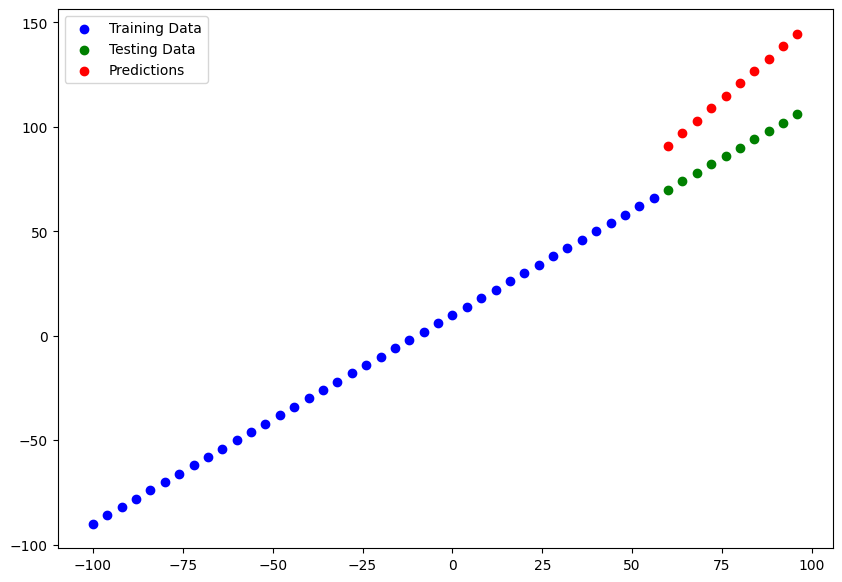

In [45]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [46]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.8175>,
 <tf.Tensor: shape=(), dtype=float32, numpy=920.334>)

## Build `model_3`
* 2 Layers, trained for 500 epochs

In [47]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 17ms/step - loss: 22.2628 - mae: 22.2628
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 23.0472 - mae: 23.0472
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 28.2601 - mae: 28.2601
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 13.9571 - mae: 13.9571
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 19.0329 - mae: 19.0329
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 9.5229 - mae: 9.5229
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 10.4942 - mae: 10.4942
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 12.1116 - mae: 12.1116
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 38.0811 - mae: 38.0811
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 25.6573 - mae: 25.6573
Epoch 11/500
2/2 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 96ms/step


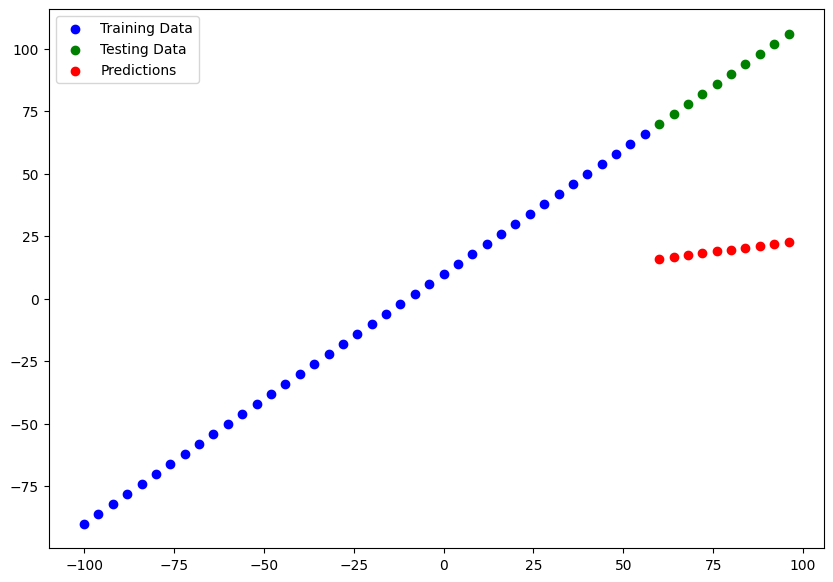

In [48]:
# Make and plot predictions of model_2
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [49]:
# Calculate model_2 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.70104>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4806.409>)

**Note**: Start with small experiments (small models) and make sure they work and then increases their scale when necessary.

# Comparing the results of our Experiments
We've run a few experiments, let's compare the results.

In [50]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])

all_results

,model,mae,mse
0,model_1,30.707941,953.479004
1,model_2,29.817499,920.333984
2,model_3,68.701042,4806.409180


Looks like `model_2` performed the best...

In [51]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking your experiments

One really good habit in ML modelling is to track the results of experiments.
And when doing so, it can be tedious if running lot of experiments.
Luckily, there are tools to help us!
* TensorBoard - A component of the TensorFlow library to help track modelling experiments.
* Weights and Biases - A tool for tracking all of kinds of machine learning (plugs straight into TensorBoard).

# Saving Models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [52]:
# Save model using save model format
model_2.save("best_model_SavedModel_format")

In [53]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading in a saved model

In [54]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
# Load in the HDF5 format model
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Mini Project

## Baseline

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

In [59]:
# Let's try one-hot encode DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [61]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [62]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [63]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [64]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [73]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8926.1357 - mae: 8926.1357


[8926.1357421875, 8926.1357421875]

**Let's Improve the model**

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use Adam optimizer.
2. Same as above but Train for longer.



Experiment 1 -

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [93]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8627.9062 - mae: 8627.9062


[8627.90625, 8627.90625]

Experiments 3 -

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

In [91]:
# Check the results of the insurance model on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8631.8350 - mae: 8631.8350


[8631.8349609375, 8631.8349609375]

In [94]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8627.9062 - mae: 8627.9062


[8627.90625, 8627.90625]

In [88]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8926.1357 - mae: 8926.1357


[8926.1357421875, 8926.1357421875]

Text(0.5, 0, 'epochs')

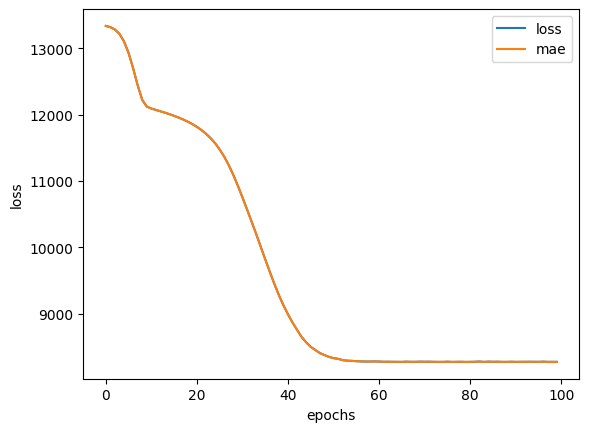

In [96]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> **Question**: How Long should we train for?

It depends on the problem you're working on. However, TensorFlow has a solution! It's called the EarlyStopping Callback

## Preprocessing Data (Normalization and Standardization)

* Scale (normalization)
  * Converts all values to between 0 and 1 whilst preserving the original distribution.
  * MinMaxScaler (sklearn funciton).
  * Use as default scaler with neural networks.

* Standardization
  * Removes the mean and divides each value by the standard deviation.
  * StandardScaler (sklearn function).
  * Transform a feature to have close to normal distribution (caution: This reduces the effect of Outliers).

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [108]:
# Build a neural network model to fit on normalized data

tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_4.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13345.2939 - mae: 13345.2939
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.5928 - mae: 13342.5928
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.1914 - mae: 13336.1914
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13323.2021 - mae: 13323.2021
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13300.5859 - mae: 13300.5859
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13265.1699 - mae: 13265.1699
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13214.0869 - mae: 13214.0869
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13144.6230 - mae: 13144.6230
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13054.1035 - mae: 13054.1035
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12939.98

In [109]:
# Check the results of the insurance model on the test data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8622.0215 - mae: 8622.0215


[8622.021484375, 8622.021484375]

Text(0.5, 0, 'epochs')

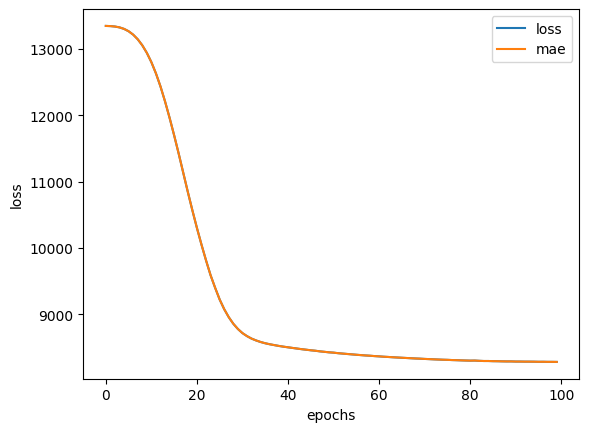

In [110]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")